<a href="https://colab.research.google.com/github/hemang03/sntiment_train/blob/master/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/sms_spam.csv'  , error_bad_lines=True)

In [8]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['type'] = df['type'].map({'ham':1 , 'spam':0})

In [12]:
df[df.type == 1].shape

(4827, 2)

In [11]:
df[df.type == 1].shape

(4827, 2)

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
stop_set = stopwords.words('english')

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(lowercase =True , stop_words= stop_set , use_idf=True , strip_accents='ascii' , min_df =1 )
tf.fit(df)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='ascii', sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [17]:
X = tf.fit_transform(df.text)

In [18]:
np.array(X)

array(<5574x8586 sparse matrix of type '<class 'numpy.float64'>'
	with 47400 stored elements in Compressed Sparse Row format>, dtype=object)

In [19]:
split_1 = df.text[0].split()

In [21]:
split_2 = df.text[1].split()

In [25]:
y = df.type

In [23]:
X.shape

(5574, 8586)

In [26]:
y.shape

(5574,)

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state =42)

In [29]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_pred , y_test)

In [35]:
cm

array([[ 152,    0],
       [  39, 1203]])

In [36]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


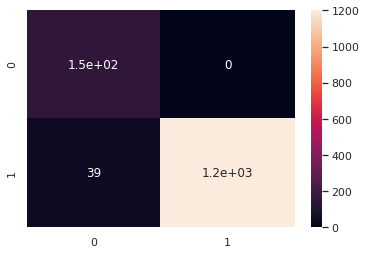

In [38]:
sns.set(font='sans-serif')
sns.heatmap(cm , annot=True)

In [39]:
model.score(X_test , y_test)

0.9720229555236729